In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout

Using TensorFlow backend.


In [2]:
#read data
suicide_df = pd.read_csv('master.csv')

In [3]:
suicide_df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
countryyears = suicide_df['country-year'].unique()
age = suicide_df.age.unique()
years = suicide_df.year.unique()
countries = suicide_df.country.unique()

In [5]:
# pivot_table for age distribution of number of suicides
df1 = pd.pivot_table(suicide_df[suicide_df['country-year']=='Latvia2000'], values='suicides_no', index='age',columns='year', aggfunc='sum')
df1

year,2000
age,
15-24 years,61
25-34 years,98
35-54 years,304
5-14 years,6
55-74 years,233
75+ years,68


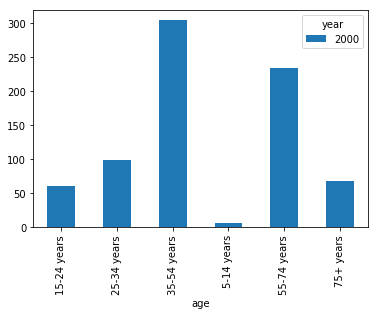

In [6]:
df1.plot(kind='bar')

the age group of maximum suicide rate varies from country to country.

In [7]:
#to get suicide rate relative to gdp
def suicide_rate(country):
    gdp_and_suicide_rate= pd.DataFrame(columns=['Year','No_of_suicides/100k_pop','gdp_per_capita'])
    i=0
    for year in years:
        filtered_2 = suicide_df[(suicide_df['country'] == country) & (suicide_df['year'] == year)]
        suicide_rate = filtered_2.sum(axis=0)
#         print(year, suicide_rate['suicides/100k pop'],suicide_rate['gdp_per_capita ($)']/12)
        gdp_and_suicide_rate.loc[i]=[year, suicide_rate['suicides/100k pop'],suicide_rate['gdp_per_capita ($)']/12]
        i+=1
#         gdp_and_suicide_rate.append({'Year':year,'No_of_suicides/100k_pop':suicide_rate['suicides/100k pop'], 'gdp_per_capita' :suicide_rate['gdp_per_capita ($)']/12}, ignore_index=True) 
    return(gdp_and_suicide_rate)
    print(gdp_and_suicide_rate)
#         print(year, suicide_rate['suicides/100k pop'],suicide_rate['gdp_per_capita ($)']/12)countryes=['Latvia','Belarus','Spain']


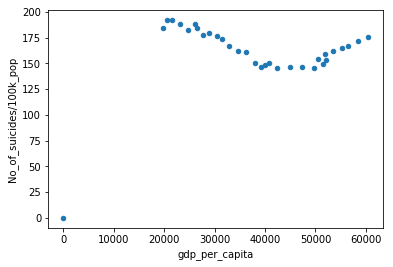

In [8]:
df= suicide_rate('United States')
df.plot(x= 'gdp_per_capita', y='No_of_suicides/100k_pop', kind='scatter')

there is a correlation between gdp and suicide rate but varies from country to country.

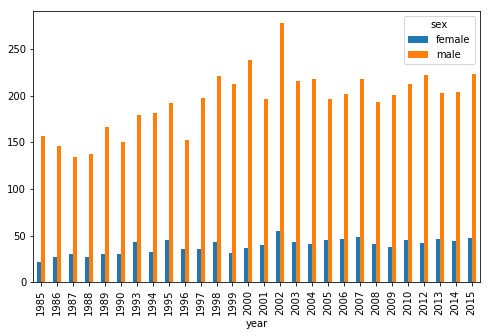

In [9]:
#suicide rate vs sex
df3 = pd.pivot_table(suicide_df[suicide_df['country']=='Uruguay'], values='suicides/100k pop',index='year', columns=['sex'], aggfunc='sum')

df3.plot(kind='bar', figsize=(8,5))

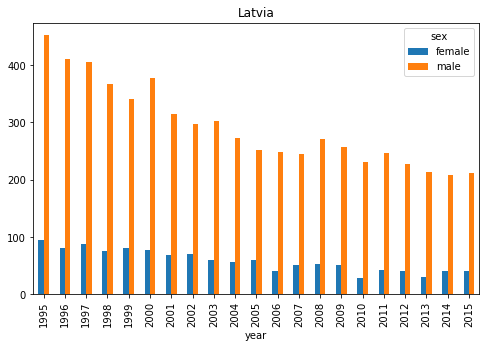

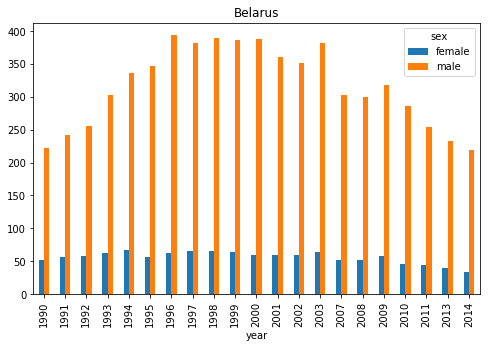

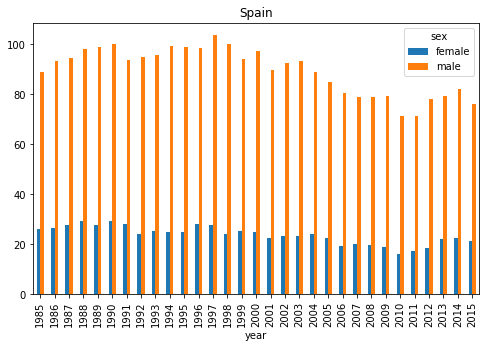

In [10]:
countryes=['Latvia','Belarus','Spain']
for country in countryes:
    df3 = pd.pivot_table(suicide_df[suicide_df['country']==country], values='suicides/100k pop',index='year', columns=['sex'], aggfunc='sum')
    df3.plot(kind='bar', figsize=(8,5), title=country)

In all countries number of male suicides is greater than number of female suicides

In [11]:
#to find years of max number of suicides
df4 = pd.pivot_table(suicide_df, values='suicides/100k pop',index='year', columns='country', aggfunc='sum')
for country in countries:
    print(df4.idxmax())


country
Albania                         1997
Antigua and Barbuda             2000
Argentina                       1986
Armenia                         1994
Aruba                           1995
Australia                       1987
Austria                         1987
Azerbaijan                      2001
Bahamas                         2010
Bahrain                         2004
Barbados                        1990
Belarus                         1996
Belgium                         1985
Belize                          1994
Bosnia and Herzegovina          2014
Brazil                          2015
Bulgaria                        1992
Cabo Verde                      2011
Canada                          1986
Chile                           2009
Colombia                        2000
Costa Rica                      2003
Croatia                         1998
Cuba                            1993
Cyprus                          2013
Czech Republic                  1990
Denmark                       

country
Albania                         1997
Antigua and Barbuda             2000
Argentina                       1986
Armenia                         1994
Aruba                           1995
Australia                       1987
Austria                         1987
Azerbaijan                      2001
Bahamas                         2010
Bahrain                         2004
Barbados                        1990
Belarus                         1996
Belgium                         1985
Belize                          1994
Bosnia and Herzegovina          2014
Brazil                          2015
Bulgaria                        1992
Cabo Verde                      2011
Canada                          1986
Chile                           2009
Colombia                        2000
Costa Rica                      2003
Croatia                         1998
Cuba                            1993
Cyprus                          2013
Czech Republic                  1990
Denmark                       

In [12]:
#to find years of min number of suicides
for country in countries:
    print(df4.idxmin())

country
Albania                         2005
Antigua and Barbuda             1985
Argentina                       2013
Armenia                         1999
Aruba                           2003
Australia                       2006
Austria                         2016
Azerbaijan                      1999
Bahamas                         2003
Bahrain                         1997
Barbados                        2002
Belarus                         2014
Belgium                         2015
Belize                          1989
Bosnia and Herzegovina          2011
Brazil                          1986
Bulgaria                        2011
Cabo Verde                      2011
Canada                          2011
Chile                           1992
Colombia                        1989
Costa Rica                      1991
Croatia                         2013
Cuba                            2014
Cyprus                          1999
Czech Republic                  2016
Denmark                       

Length: 101, dtype: int64
country
Albania                         2005
Antigua and Barbuda             1985
Argentina                       2013
Armenia                         1999
Aruba                           2003
Australia                       2006
Austria                         2016
Azerbaijan                      1999
Bahamas                         2003
Bahrain                         1997
Barbados                        2002
Belarus                         2014
Belgium                         2015
Belize                          1989
Bosnia and Herzegovina          2011
Brazil                          1986
Bulgaria                        2011
Cabo Verde                      2011
Canada                          2011
Chile                           1992
Colombia                        1989
Costa Rica                      1991
Croatia                         2013
Cuba                            2014
Cyprus                          1999
Czech Republic                  2016
Denm

There is no clear trend on the number of suicides increasing or decreasing over the years.

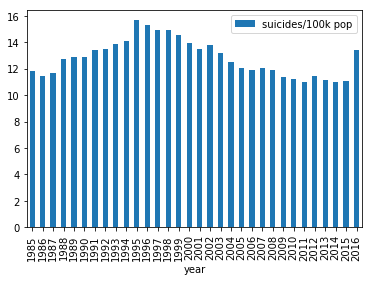

In [13]:
# trend over the years
df5= pd.pivot_table(suicide_df, values='suicides/100k pop',index='year', aggfunc='mean')
df5.plot(kind='bar')

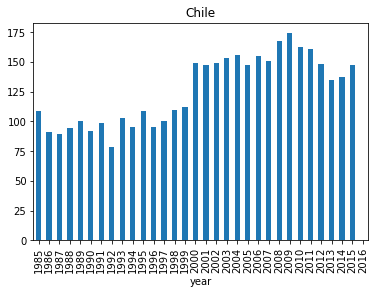

In [14]:
# trend over the years for a particular country
df5= pd.pivot_table(suicide_df, values='suicides/100k pop',index='year',columns='country', aggfunc='sum')

country= 'Chile' # enter country name here
df5[country].plot(kind='bar', title=country)

In [16]:
happiness2015_df = pd.read_csv('2015.csv')

In [20]:
suicide_rates_df = pd.read_csv('master.csv')
suicide2015_df = suicide_rates_df.loc[suicide_rates_df['year'] == 2015]

In [21]:
happiness_countries = happiness2015_df.Country.values
suicide_countries = suicide2015_df.country.unique()

countries_intersect = set(suicide_countries).intersection(set(happiness_countries))

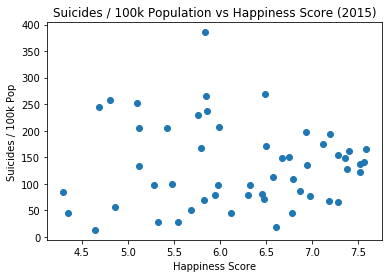

In [22]:
happiness_scores = []
suicides_per_100k = []
family_scores = []
freedom_scores = []
trust_scores = []
generosity_scores = []
life_scores = []

for country in countries_intersect:
  happiness_scores.append(happiness2015_df.loc[happiness2015_df['Country'] == country]['Happiness Score'].sum())
  suicides_per_100k.append(suicide2015_df.loc[suicide2015_df['country'] == country]['suicides/100k pop'].sum())
  family_scores.append(happiness2015_df.loc[happiness2015_df['Country'] == country]['Family'].sum())
  freedom_scores.append(happiness2015_df.loc[happiness2015_df['Country'] == country]['Freedom'].sum())
  trust_scores.append(happiness2015_df.loc[happiness2015_df['Country'] == country]['Trust (Government Corruption)'].sum())
  generosity_scores.append(happiness2015_df.loc[happiness2015_df['Country'] == country]['Generosity'].sum())
  life_scores.append(happiness2015_df.loc[happiness2015_df['Country'] == country]['Health (Life Expectancy)'].sum())

plt.scatter(happiness_scores, suicides_per_100k)
plt.xlabel('Happiness Score')
plt.ylabel('Suicides / 100k Pop')
plt.title('Suicides / 100k Population vs Happiness Score (2015)')
# plt.savefig('suic_hapscore_2015.png')
plt.show()

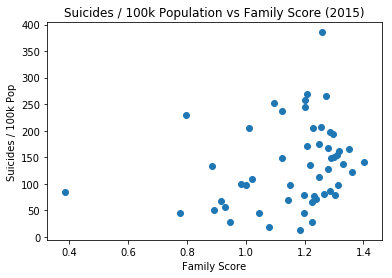

In [23]:
plt.scatter(family_scores, suicides_per_100k)
plt.xlabel('Family Score')
plt.ylabel('Suicides / 100k Pop')
plt.title('Suicides / 100k Population vs Family Score (2015)')
# plt.savefig('suic_famscore_2015.png')
plt.show()

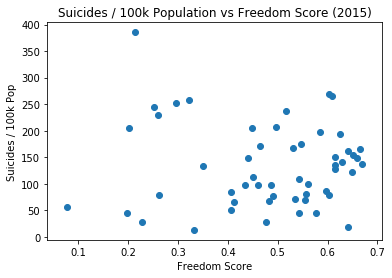

In [24]:
plt.scatter(freedom_scores, suicides_per_100k)
plt.xlabel('Freedom Score')
plt.ylabel('Suicides / 100k Pop')
plt.title('Suicides / 100k Population vs Freedom Score (2015)')
# plt.savefig('suic_freescore_2015.png')
plt.show()

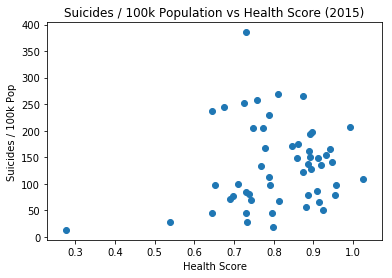

In [25]:
plt.scatter(life_scores, suicides_per_100k)
plt.xlabel('Health Score')
plt.ylabel('Suicides / 100k Pop')
plt.title('Suicides / 100k Population vs Health Score (2015)')
# plt.savefig('suic_healthscore_2015.png')
plt.show()

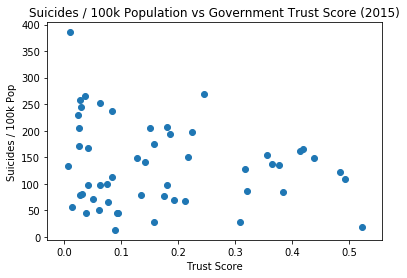

In [26]:
plt.scatter(trust_scores, suicides_per_100k)
plt.xlabel('Trust Score')
plt.ylabel('Suicides / 100k Pop')
plt.title('Suicides / 100k Population vs Government Trust Score (2015)')
# plt.savefig('suic_trustscore_2015.png')
plt.show()

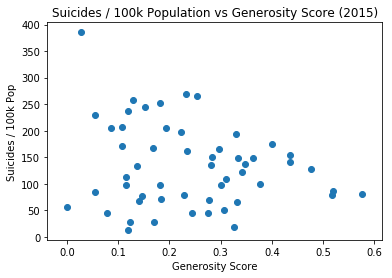

In [27]:
plt.scatter(generosity_scores, suicides_per_100k)
plt.xlabel('Generosity Score')
plt.ylabel('Suicides / 100k Pop')
plt.title('Suicides / 100k Population vs Generosity Score (2015)')
# plt.savefig('suic_generscore_2015.png')
plt.show()

In [29]:
#Slight trend with trust (in gov) and generosity score.

In [30]:
# calculating correlation coeff between suicides and trust in gov and generosity\

corr_trust_suic = np.corrcoef(suicides_per_100k, trust_scores)
corr_gen_suic = np.corrcoef(suicides_per_100k, generosity_scores)
corr_hap = np.corrcoef(suicides_per_100k, happiness_scores)
corr_fam = np.corrcoef(suicides_per_100k, family_scores)
corr_health = np.corrcoef(suicides_per_100k, life_scores)
corr_free = np.corrcoef(suicides_per_100k, freedom_scores)


print('trust', corr_trust_suic)
print('gen', corr_gen_suic)
print('hap', corr_hap)
print('free', corr_free)
print('health', corr_health)
print('fam', corr_fam)

trust [[ 1.         -0.16210708]
 [-0.16210708  1.        ]]
gen [[ 1.         -0.19443382]
 [-0.19443382  1.        ]]
hap [[ 1.         -0.01317556]
 [-0.01317556  1.        ]]
free [[ 1.         -0.05721717]
 [-0.05721717  1.        ]]
health [[1.         0.15573506]
 [0.15573506 1.        ]]
fam [[1.         0.24478101]
 [0.24478101 1.        ]]
